In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Bigger font
sns.set(font_scale=1.3)
plt.style.use('fivethirtyeight')
# Figure size®
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 2.5
rcParams['lines.marker'] = '.'
rcParams['lines.linewidth'] = 1
rcParams['lines.markersize'] = 5
rcParams['legend.fontsize'] = 10
rcParams['axes.titlesize'] = 16
# plt.rc('figure.subplot', wspace=.33)
# Slides
from notebook.services.config import ConfigManager
cm = ConfigManager()
# cm.update('livereveal', {'width': 1024, 'height': 768, 'scroll': True, 'theme': 'simple', 'transition': 'linear'});
# np.random.seed(123)

from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"  # print not only the last variable
%config InlineBackend.figure_format ='retina'  # retine quality plots

In [23]:
from BO import BO
import numpy as np
from scipy.stats import multivariate_normal

class SchwefelsFunction:

    function_name = "Schwefel's function"

    def __call__(self, x):
        d = len(x)
        return 418.9829*d - np.sum([xi * np.sin(np.sqrt(np.linalg.norm(xi))) for xi in x])

    def get_function_name(self):
        return self.function_name

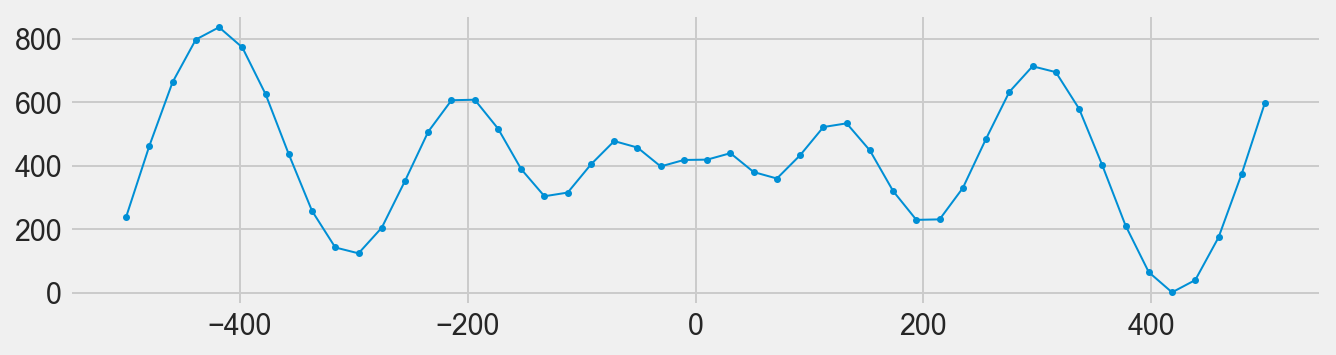

In [24]:
f = SchwefelsFunction()
x = np.linspace(-500,500)
y = [f([i]) for i in x]
plt.plot(x, y)

In [25]:
class GaussianMixtureFunction:

    function_name = 'Gaussian mixture function'

    def __init__(self, dim, mean_1, mean_2):
        self.dim = dim
        self.np_1 = multivariate_normal(np.full(dim, mean_1), np.diag(np.ones(dim)))
        self.np_2 = multivariate_normal(np.full(dim, mean_2), np.diag(np.ones(dim)))
        self.max_value = self.np_1.pdf(np.full(dim, mean_1)) + 0.5 * self.np_2.pdf(np.full(dim, mean_1))

    def __call__(self, x):
        return (self.np_1.pdf(x) + 0.5 * self.np_2.pdf(x)) / self.max_value

    def get_function_name(self):
        return self.function_name

In [26]:
class BraininFunction:

    function_name = 'Brainin function'

    def __init__(self, effective1, effective2):
        self.effective1 = effective1
        self.effective2 = effective2

    def __call__(self, x):
        x1 = x[0][self.effective1]
        x2 = x[0][self.effective2]
        return ((x2 - (5.1*(x2**2)/(4*(np.pi**2))) + 5*x1/np.pi - 6)**2 + 10*(1-1/(8*np.pi))*np.cos(x1) + 10) - 0.397887

    def get_function_name(self):
        return self.function_name

## 10 Dimensions

In [27]:
domain = [{'name': 'x0', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x1', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x2', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x3', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x4', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x5', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x6', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x7', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x8', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x9', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1}
          ]


Initialized


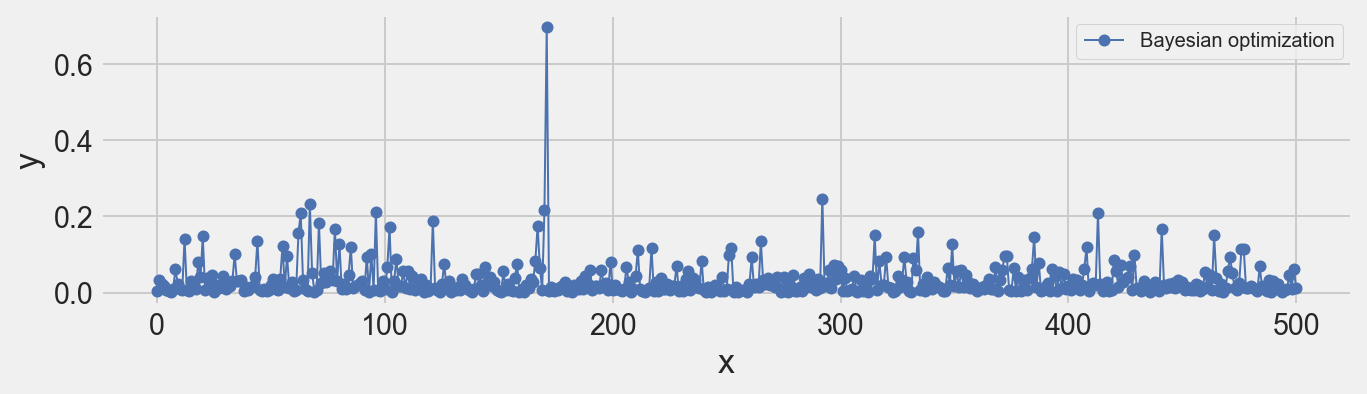

In [28]:
dim = len(domain)
fill_in_strategy = 'random'
f = GaussianMixtureFunction(dim=dim, mean_1=2, mean_2=3)

method = BO(f=f, domain=domain, model_type='GP', acquisition_type ='UCB')
method.run_optimization(max_iter=500)

X, Y = method.get_evaluations()

plt.plot(Y, 'bo-', label='Bayesian optimization');
plt.xlabel('x');
plt.ylabel('y');
# plt.title('');
plt.legend();
# f.savefig("boiterations.pdf", bbox_inches='tight');

## 20 Dimensions

In [31]:
domain = [{'name': 'x0', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x1', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x2', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x3', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x4', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x5', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x6', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x7', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x8', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x9', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x10', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x11', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x12', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x13', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x14', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x15', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x16', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x17', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x18', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          {'name': 'x19', 'type': 'continuous', 'domain': (1, 4), 'dimensionality': 1},
          ]


Initialized


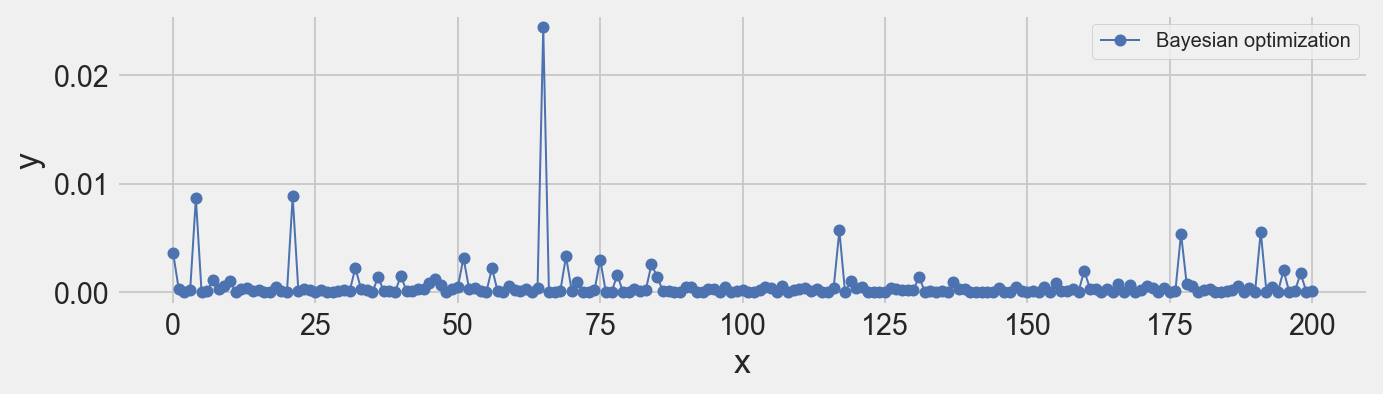

In [32]:
dim = len(domain)
fill_in_strategy = 'random'
f = GaussianMixtureFunction(dim=dim, mean_1=2, mean_2=3)

method = BO(f=f, domain=domain, model_type='GP', acquisition_type ='UCB')
method.run_optimization(max_iter=200)

X, Y = method.get_evaluations()

plt.plot(Y, 'bo-', label='Bayesian optimization');
plt.xlabel('x');
plt.ylabel('y');
# plt.title('');
plt.legend();
# f.savefig("boiterations.pdf", bbox_inches='tight');